In [4]:
import zipfile
import os

# ZIP file ka path (aapne jo diya hai)
zip_path = r"C:\Users\vansh\Downloads\archive (5).zip"
extract_folder = "extracted_data"  # Extracted data yahan store hoga

# ZIP file ko extract karna
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ ZIP extracted successfully.")


✅ ZIP extracted successfully.


In [5]:
os.listdir(extract_folder)


['International_Education_Costs.csv']

In [11]:
import pandas as pd

# CSV file ka path (extracted folder ke andar)
csv_path = os.path.join(extract_folder, "International_Education_Costs.csv")  # Change 'train.csv' if needed

# Load CSV file
df = pd.read_csv(csv_path)
df.head(2)


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79


In [9]:
df = pd.read_csv(csv_path, encoding='latin1')  # or 'ISO-8859-1' or 'utf-16'



In [12]:
# Top 5 rows check karo
df.head()

# Data types aur missing values check karo
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Features (X) and Target (y)
X = df[['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']]
y = df['Duration_Years']  # Target variable (Duration_Years)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Model Predictions
y_pred = model.predict(X_test)


Mean Absolute Error (MAE): 0.7401505102040816
Mean Squared Error (MSE): 0.8190140138304864
R² Score: 0.10524339729152277


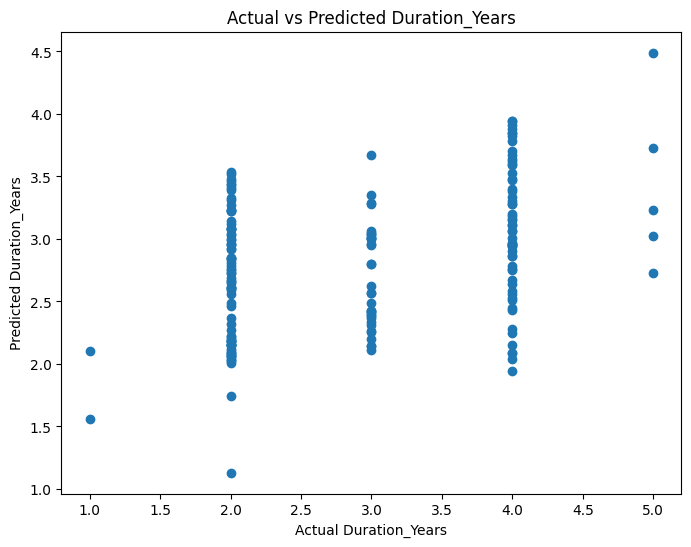

In [26]:

# Step 7: Model Evaluation (MAE, MSE, R² Score)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Step 8: Visualize Actual vs Predicted Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Duration_Years')
plt.ylabel('Predicted Duration_Years')
plt.title('Actual vs Predicted Duration_Years')
plt.show()

# Step 9: Feature Importance (Optional)
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)





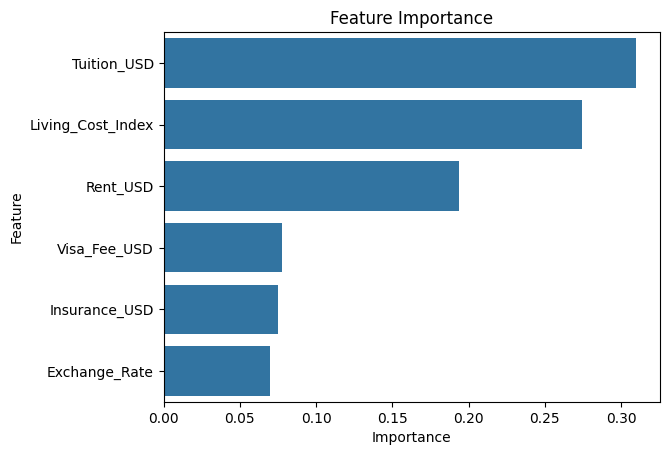

In [20]:
# Plot the feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters define karo
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest Regressor ke liye GridSearchCV setup karo
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1, verbose=2)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best parameters ko print karo
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Best Model ko evaluate karo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Performance ko evaluate karo
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"MAE: {mae_best}")
print(f"MSE: {mse_best}")
print(f"R²: {r2_best}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
MAE: 0.7504791210286059
MSE: 0.7820108148465946
R²: 0.14566865992814648


In [27]:
from sklearn.model_selection import cross_val_score

# Random Forest Regressor ke liye cross-validation
cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42),
                            X_train, y_train, cv=5)  # 5-fold cross-validation

# Cross-validation scores ko print karo
print(f"Cross-validation scores: {cv_scores}")
print(f"Average Cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [-0.1178771  -0.20709832 -0.04776775 -0.08171637  0.06516188]
Average Cross-validation score: -0.07785953194660251


In [34]:
import joblib
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [35]:
from flask import Flask, request, jsonify
import joblib

# Flask app create karo
app = Flask(__name__)

# Model load karo
model = joblib.load('trained_model.pkl')

# Route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = [data['Tuition_USD'], data['Living_Cost_Index'], data['Rent_USD'],
                data['Visa_Fee_USD'], data['Insurance_USD'], data['Exchange_Rate']]

    prediction = model.predict([features])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\vansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\interactiveshell.py:3675: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [31]:
import os

model_path = os.path.join("extracted_data", "trained_model.pkl")
print(os.path.exists(model_path))  # Agar True aaya toh file exist karti hai


False
